In [ ]:
import numpy as np

# Valores y vectores propios

In [ ]:
A = np.array([[3,2], [1, 0]])
A

array([[3, 2],
       [1, 0]])

In [ ]:
λ , v = np.linalg.eig(A)
print(λ)
print(v)

[ 3.56155281 -0.56155281]
[[ 0.96276969 -0.48963374]
 [ 0.27032301  0.87192821]]


In [ ]:
v = v.T
v

array([[ 0.96276969,  0.27032301],
       [-0.48963374,  0.87192821]])

Multiplico la matriz con el vector

In [ ]:
v[0]

array([0.96276969, 0.27032301])

In [ ]:
np.dot(A, v[0])

array([3.42895508, 0.96276969])

In [ ]:
λ[0] * v[0]

array([3.42895508, 0.96276969])

# PCA - Análisis de Componentes Principales

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## Carga de Datos

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data
y = iris.target

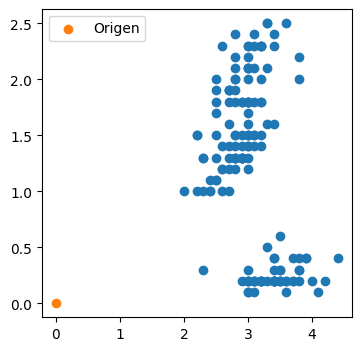

In [ ]:
plt.figure(figsize = (4,4))
plt.scatter(X[:, 1], X[:,3])
plt.scatter(0,0, label="Origen")
plt.legend()
plt.show()

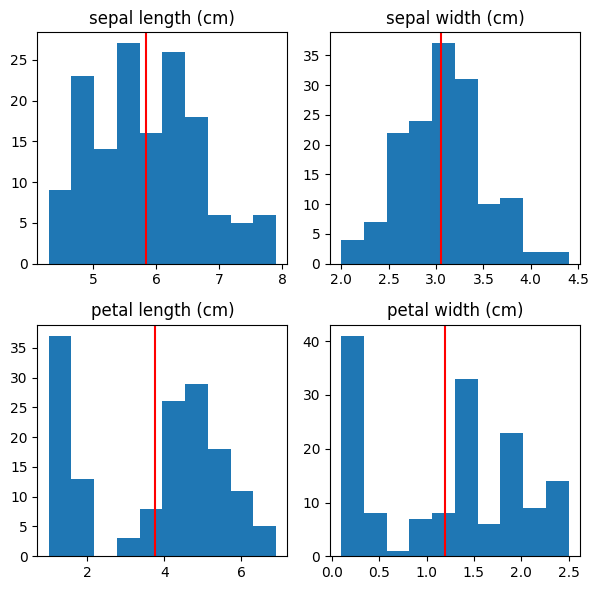

In [ ]:
plt.figure(figsize = (6,6))
plt.subplot(2 , 2, 1)
plt.hist(X[:,0])
plt.axvline(X[:,0].mean(), color = "red")
plt.title(iris.feature_names[0])

plt.subplot(2 , 2, 2)
plt.hist(X[:,1])
plt.axvline(X[:,1].mean(), color = "red")
plt.title(iris.feature_names[1])

plt.subplot(2 , 2, 3)
plt.hist(X[:,2])
plt.axvline(X[:,2].mean(), color = "red")
plt.title(iris.feature_names[2])

plt.subplot(2 , 2, 4)
plt.hist(X[:,3])
plt.axvline(X[:,3].mean(), color = "red")
plt.title(iris.feature_names[3])

plt.tight_layout()

plt.show()


Crear un DataFrame con los datos

In [ ]:
df = pd.DataFrame(X, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df["target"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


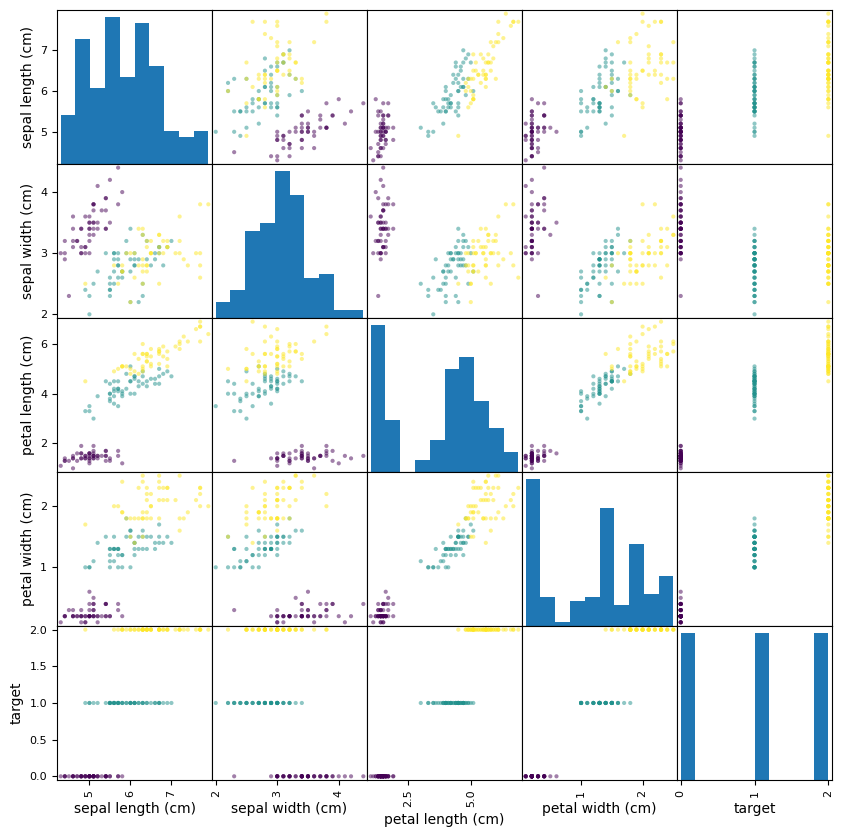

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, c = y , figsize = (10,10))
plt.show()

# Centrado de datos


In [ ]:
np.mean(X, axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [ ]:
X_ = X - np.mean(X, axis=0)

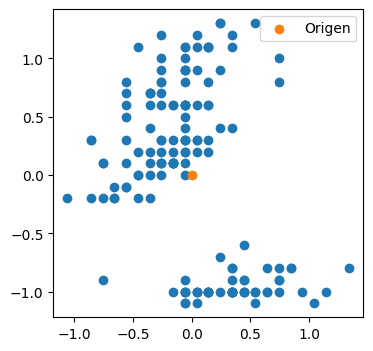

In [ ]:
plt.figure(figsize = (4,4))
plt.scatter(X_[:, 1], X_[:,3])
plt.scatter(0,0, label="Origen")
plt.legend()
plt.show()

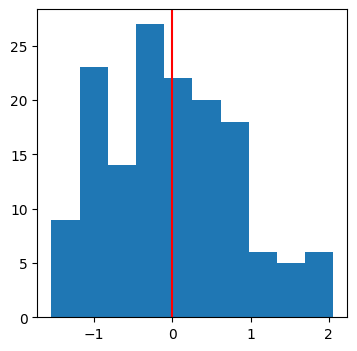

In [ ]:
plt.figure(figsize = (4,4))
plt.hist(X_[:,0])
plt.axvline(X_[:,0].mean(), color = "red")
plt.show()

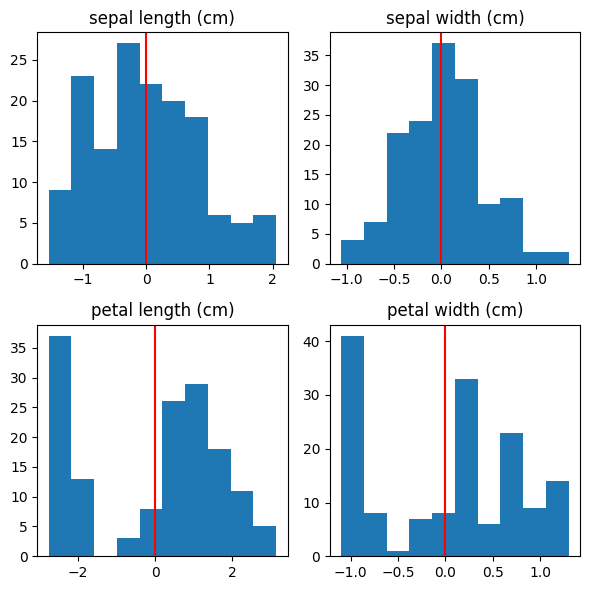

In [ ]:
plt.figure(figsize = (6,6))
plt.subplot(2 , 2, 1)
plt.hist(X_[:,0])
plt.axvline(X_[:,0].mean(), color = "red")
plt.title(iris.feature_names[0])

plt.subplot(2 , 2, 2)
plt.hist(X_[:,1])
plt.axvline(X_[:,1].mean(), color = "red")
plt.title(iris.feature_names[1])

plt.subplot(2 , 2, 3)
plt.hist(X_[:,2])
plt.axvline(X_[:,2].mean(), color = "red")
plt.title(iris.feature_names[2])

plt.subplot(2 , 2, 4)
plt.hist(X_[:,3])
plt.axvline(X_[:,3].mean(), color = "red")
plt.title(iris.feature_names[3])

plt.tight_layout()

plt.show()


In [ ]:
np.mean(X_, axis=0)

array([-1.12502600e-15, -7.60872846e-16, -2.55203266e-15, -4.48530102e-16])

## Matriz de covarianza

In [ ]:
A = np.transpose(X_)
K = np.cov(A)
K

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

Calculo de valores y vectores porpios

In [ ]:
eig_values , eig_vectors = np.linalg.eig(K)

In [ ]:
eig_values

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [ ]:
eig_vectors

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

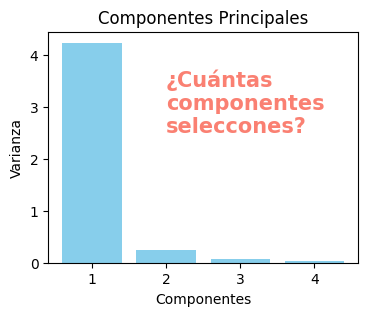

In [ ]:
plt.figure(figsize=(4,3))
plt.title("Componentes Principales")
plt.bar(range(len(eig_values)), eig_values, color="skyblue")
plt.xticks(range(4) , range(1, 5))
plt.xlabel("Componentes")
plt.ylabel("Varianza")
plt.text(1, 2.5, "¿Cuántas\ncomponentes\nseleccones?",
         color="salmon", weight="bold", size=15)
plt.show()

In [ ]:
eig_values.sum()

4.572957046979869

In [ ]:
porcent = 100 * eig_values / eig_values.sum()
porcent

array([92.46187232,  5.30664831,  1.71026098,  0.52121839])

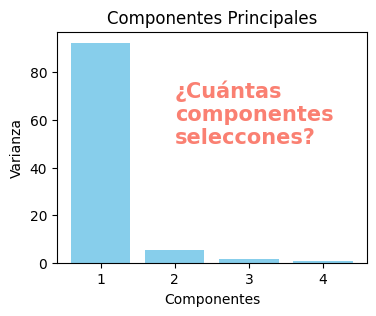

In [ ]:
plt.figure(figsize=(4,3))
plt.title("Componentes Principales")
plt.bar(range(len(eig_values)), porcent, color="skyblue")
plt.xticks(range(4) , range(1, 5))
plt.xlabel("Componentes")
plt.ylabel("Varianza")
plt.text(1, 50, "¿Cuántas\ncomponentes\nseleccones?",
         color="salmon", weight="bold", size=15)
plt.show()

In [ ]:
porcent.cumsum()

array([ 92.46187232,  97.76852063,  99.47878161, 100.        ])

Si se selecionan las dos primeras componentes, se captura el $97.8\%$ de los datos.

Ahora se realiza la seleccion de componentes

In [ ]:
eig_vectors

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [ ]:
m = 2
M = eig_vectors[:, :m]
M

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

In [ ]:
A.shape

(4, 150)

In [ ]:
M_m = np.matmul(M.T , A)
M_m.shape

(2, 150)

In [ ]:
X_m = M_m.T
X_m.shape

(150, 2)

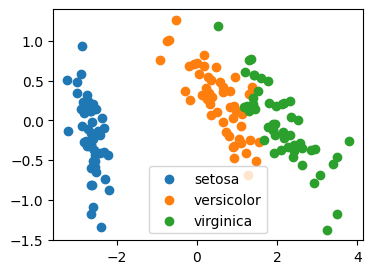

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(X_m[np.where(y == 0)[0], 0], X_m[np.where(y == 0)[0], 1],
            label = iris.target_names[0])
plt.scatter(X_m[np.where(y == 1)[0], 0], X_m[np.where(y == 1)[0], 1],
            label = iris.target_names[1])
plt.scatter(X_m[np.where(y == 2)[0], 0], X_m[np.where(y == 2)[0], 1],
            label = iris.target_names[2])

plt.legend()
plt.show()

PSA es un algoritmo no supervisado ya que no se basa en el etiquetado de los datos.

¿Qué pasa si intento hacer reducción dimensional sobre los puntos que obtuve?

In [ ]:
A2 = X_m.T
K2 = np.cov(A2)
K2

array([[ 4.22824171e+00, -1.30562438e-15],
       [-1.30562438e-15,  2.42670748e-01]])

Es prácticamente una matriz diagonal. Los elementos fuera de la diagonal son casi cero. $≈ 0$

In [ ]:
eig_values2 , eig_vectors2 = np.linalg.eig(K2)

In [ ]:
eig_values2

array([4.22824171, 0.24267075])

In [ ]:
eig_vectors2

array([[ 1.0000000e+00,  3.2758779e-16],
       [-3.2758779e-16,  1.0000000e+00]])